In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as ff
init_notebook_mode(connected=True)
import plotly.graph_objects as go

from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay, roc_curve, ConfusionMatrixDisplay, roc_auc_score, r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from matplotlib.pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

#xgb


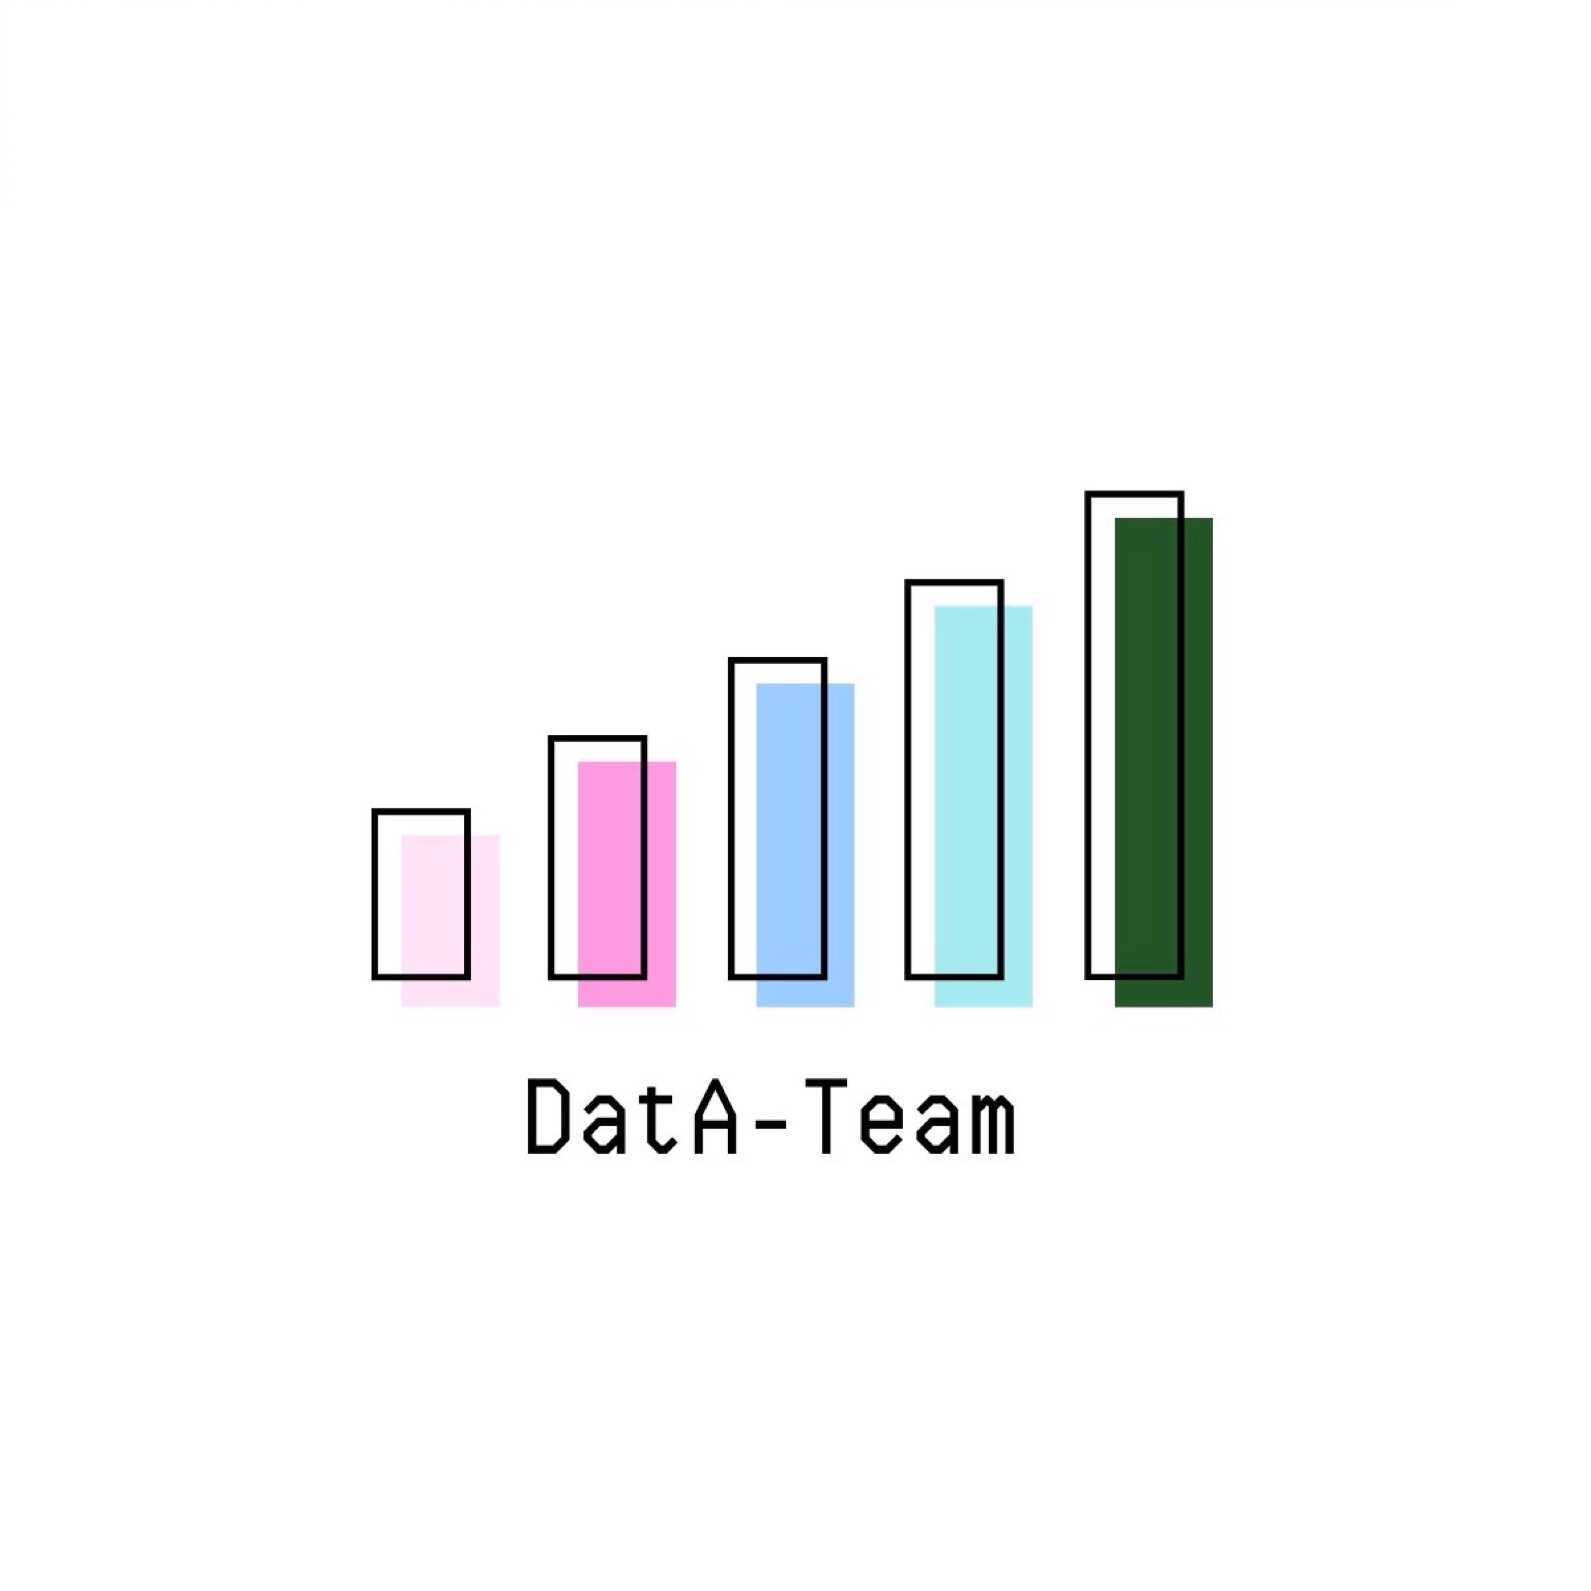

In [2]:
Image("./data_team_logo.jpg", width=600)

# How Expensive Is Your Health? Exploring the Cost of Wellness


**Team members**
- Agnieszka Kołomyjec
- Barbara Wierzba-Sowińska
- Krzysztof Łukjanowicz
- Marcin Sarnowski
- Natalia Skrzypczak

**Conspect**
- ML goal: determination of health costs based on the parameters of the insured
- App goal: to help determine the health insurance threshold
- <a href="https://www.kaggle.com/datasets/mirichoi0218/insurance">Kaggle dataset</a>


**Data Description**

The data used for this project is a dataset on Uber Eats USA restaurants and menus, which was obtained from Kaggle. The dataset includes information on over 20,000 restaurants and menus, including their location, cuisine type, rating, and price range. Additionally, the dataset includes information on the individual dishes available at each restaurant, including their name, price, and description.

**Project Description**

The goal of this project is to provide insights for an investor who wants to open a vegetarian restaurant in the USA. To achieve this, we analyzed the Uber Eats USA Restaurants Menus dataset from Kaggle, which contains information on various restaurants and their menus. The analysis focused on identifying the most popular vegetarian cuisines and dishes, as well as the top locations for vegetarian restaurants in the USA. The insights from this analysis can help the investor make informed decisions regarding the location and profile of their new vegetarian restaurant.

**Contents**

- Importing necessary libraries
- Data mining
- 
* [1. Goal](#Goal)
* [2. Research](#Research)
* [3. Data processing](#Data_processing)
* [4. Model selection](#Model_selection)
* [5. Predictive analysis on a selected model](#Predictive)
* [6. Final conclusions](#Final_conclusions)
* [7. Application](#Application)


In [110]:
df = pd.read_csv('insurance.csv')
df = df.drop_duplicates()
cat=df.select_dtypes(include=['object']).columns.tolist()
for i in cat:
    obs=df[i].value_counts()
    avg_claim=df.groupby(i)["charges"].mean()
    display(pd.DataFrame({"Number of Policyholders":obs, "Average Claim Amount":avg_claim.map('${:,.2f}'.format)})\
            .sort_values('Number of Policyholders', ascending=False)\
            .style.set_caption("Variable: {}".format(i)))

,Number of Policyholders,Average Claim Amount
male,675,"$13,975.00"
female,662,"$12,569.58"


,Number of Policyholders,Average Claim Amount
no,1063,"$8,440.66"
yes,274,"$32,050.23"


,Number of Policyholders,Average Claim Amount
southeast,364,"$14,735.41"
southwest,325,"$12,346.94"
northeast,324,"$13,406.38"
northwest,324,"$12,450.84"


In [111]:
insurance.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.21,14.05,18.00,27.00,39.00,51.00,64.00
bmi,1338.0,30.66,6.10,15.96,26.30,30.40,34.69,53.13
charges,1338.0,13270.42,12110.01,1121.87,4740.29,9382.03,16639.91,63770.43


In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#insurance.charges.hist()

In [11]:
insurance = insurance.drop_duplicates()
insurance.duplicated().sum()

0

In [14]:
corr = insurance.corr()

In [62]:
fig = px.imshow(corr,
                labels=dict(x="Confusion Matrix", color="Correlation"),
                x=['Age', 'BMI', 'Children', 'Charges'],
                y=['Charges', 'Children', 'BMI', 'Age'],
                color_continuous_scale='RdBu_r'
               )
fig.update_xaxes(side="top")
fig.show()

In [18]:
fig = px.histogram(insurance, x="charges", color="sex", color_discrete_sequence=["green", "blue"], marginal="box", 
                   title="Distribution of charges for smokers and non-smokers", 
                   labels={"charges": "Charges", "count": "Count", "sex":"Sex"})
fig.show()


50% of the observations fall within the range of $4,750 to $16,700.
The average insurance cost is $9,400.
The minimum and maximum insurance values are $1,121 and $63,770, respectively.
The distribution is positively skewed, and a logarithmic transformation could be used to obtain a normal distribution.
There are three peaks in the distribution at ages 0-15, 15-25, and 35-50.
Gender-based analysis:

The mean insurance cost is similar for both sexes, at $9,400 for males and $9,377 for females.
50% of male observations fall within the range of $4,650 to $19,023, which is $5,000 higher than for females ($4,883 to $14,455).
The insurance cost distribution is very similar for both sexes, with a slight male predominance for higher insurance amounts.

In [56]:
# replacing >=4 to '4 or more'
insurance['children'] = insurance['children'].replace([4, 5], '4 or more')
# conversion to string
insurance['children'] = insurance['children'].astype(str)

children_cat = insurance.groupby(by=['children']).size().reset_index(name='counts')
fig = px.bar(data_frame=children_cat, x='children', y='counts', title='Distribution',
      labels={
          'count': 'Count',
          'children': 'Number of children'
      },
      color_discrete_sequence=['navy']
)
fig.show()

In [39]:
#region_cat = df.groupby(by=["region"]).size().reset_index(name="counts")
#px.bar(data_frame=region_cat,x="region",y="counts", title="Distribution of region",
#      labels={
#                     "count": "Count",
#                    "region":"Region"})

In [57]:
fig = px.histogram(df, x="charges", color="children", color_discrete_sequence=['navy', 'blue', 'red', 'maroon', 'purple'], marginal="box", 
                   title="Distribution of charges v children",
                   labels={
                       "count": "Count",
                       "charges": "Charges",
                       "children": "Children"
                   })
fig.show()

Insurance burden by fertility:

The average insurance burden for:
0 children: $9,800, with a range of $2,800 to $14,500
1 child: $8,500, with a range of $4,800 to $16,000
2 children: $9,300, with a range of $6,300 to $20,600
3 children: $10,600, with a range of $6,700 to $19,200
4 or more children: $9,200, with a range of $5,600 to $17,300
The insurance burden increases with the number of children.
Individuals with no children have a higher insurance burden than those with 1 or 2 children.
Individuals with 4 or more children have the lowest insurance burden.

In [71]:
fig = px.histogram(insurance, x="smoker", color='sex', barmode='group', title = 'Distrybition of sex and smoker',
                  labels={ "smoker": "Smoker", "count":"Count", 'sex':'Sex'
      },
 color_discrete_map={'female': 'blue', 'male': 'green'}
)
fig.show()

- jest przewaga osób niepalcących nad palaczami ( 79% osób nie pali - 21% pali)
- mężczyźni częściej są palaczmi niż kobiety

In [75]:
fig = px.histogram(df, x="charges", color='smoker',   marginal="box", title="Distribution of charges vs smoker",
      labels={
                     "count": "Count",
                    "charges":"Charges",
                    'smoker':'Smoker'      
      },
       color_discrete_map={'no': 'yellowgreen', 'yes': 'red'}
       )
fig.show()

- niepalący płacą mniejsze ubezpieczenie - średnio 7400
- podczas gdy palacze średnio płacą 34 500

In [80]:
fig = px.violin(df, x='sex', y='charges', box=True, color='smoker', title = 'Violin plot of charges vs sex', 
               labels={ "smoker": "Smoker",
                        "charges":"Charges",
                        'sex':'Sex'
      },color_discrete_map={'no': 'yellowgreen', 'yes': 'red'})
fig.show()

- niepalcące osoby czy to są kobiety czy mężczyźni płacą pdobną stawkę ubezpieczenia ok 7 k
- palący mężczyźni średnio płacą więcej o 7 135 niż palące kobiety i o 29 099 niż nieplacąy mężczyźni

In [82]:
fig = px.strip(df, x='smoker', y='charges', color='sex', stripmode= 'overlay',title = 'Relationship between Smokers and Charges', 
               labels={ "sex": "Sex",
                        "charges":"Charges",
                        'smoker':'Smoker'
      },color_discrete_map={'female': 'blue', 'male': 'green'})
fig.show()

In [100]:
fig = px.box(df,  x="charges", y = "smoker", color = 'sex', title = 'Box plot of charges vs sex and smoker', 
               labels={ "sex": "Sex",
                        "charges":"Charges",
                        'smoker':'Smoker'
      },color_discrete_map={'female': 'blue', 'male': 'green'})
fig.show()

In [114]:
fig = px.scatter(df, x='age', y='charges', facet_col="smoker", color="sex", trendline="ols",
                title="Relationship between age, sex, smoking and insurance cost",
                    labels={ "age": "Age",
                        "charges":"Charges",
                        'sex':'Sex'
      },color_discrete_map={'female': 'blue', 'male': 'green'})
fig.show()

In [116]:
#Linear relationship between age and insurance

- The majority of the data (136 records) belongs to younger age groups.
- The remaining age groups have approximately 50 records each.
- The median age of the data is 39 years.
- For non-smokers, there is no relationship between BMI and insurance premium.
- For smokers, there is a clear relationship - the higher the BMI, the higher the insurance premium

In [101]:
fig = px.histogram(df, x="charges", color='region', color_discrete_sequence=['navy', 'blue', 'red', 'maroon', 'purple'],  marginal="box", title="Distribution of charges vs region",
                    labels={ "count": "Count",
                        "charges":"Charges",
                        'region':'Region'      
      })
fig.show()

The distribution of policyholders' origin is uniform, and the average insurance costs are similar across different locations.
However, in the southeast region, there is a higher prevalence of expensive insurance costs, with a significant spread between the quartiles (about 4k higher than other regions).
This region also has a higher number of smokers compared to other regions.


In [102]:
fig = px.scatter(df, x='bmi', y='charges', facet_col="smoker", color="sex", trendline="ols", title="Scatter plot of smoker, BMI and sex",
                    labels={ "bmi": "BMI",
                        "charges":"Charges",
                        'sex':'Sex'
      },color_discrete_map={'female': 'blue', 'male': 'green'})
fig.show()

In [103]:
fig = px.scatter(df, x='age', y='bmi', facet_col="smoker", color="sex", trendline="ols",
                title="Scatter plot of smoker, BMI and age",
                    labels={ "bmi": "BMI",
                        "age":"Age",
                        'sex':'Sex'
      },color_discrete_map={'female': 'blue', 'male': 'green'})
fig.show()